In [237]:
#%% env: new-ml

from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split
from torchvision import datasets, transforms
from torch.autograd import variable
from itertools import chain
from sklearn import metrics as met
import pickle
from icecream import ic
import shap

import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from importlib import reload
# import util
# import model_torch_simple
# from torchmetrics import Accuracy
from tqdm import tqdm   
import argparse
from icecream import ic
import numpy as np
from PIL import Image
device = 'cuda' if torch.cuda.is_available() else 'cpu'

import numpy as np
import pandas as pd
# from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#%%
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier, plot_importance


seed = 42
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False
torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

# train_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_train_gene.csv', delimiter = ',')
# train_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_train_hml.csv')
# train_target = train_target[['EMB_MIC']]
# # don't touch test data, split out validation data from training data during training
# # test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_EMB/aa_data_test_pca4k.csv', delimiter = ',')
# test_data = np.loadtxt('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/aa_data_test_gene.csv', delimiter = ',')
# test_target = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/data_new_emb/mic_aa_test_hml.csv')
# test_target = test_target[['EMB_MIC']]

# all_data = np.concatenate((train_data, test_data), axis=0)
# all_target = pd.concat((train_target, test_target), axis=0)

# train_data, test_data, train_target, test_target = train_test_split(all_data, all_target, test_size=0.2, random_state=42, stratify=all_target)

In [238]:

def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')
    
def value_counts_list(lst):
    """
    Computes the frequency count of unique elements in a list and returns a dictionary, sorted by frequency count in
    descending order.

    Args:
    - lst (list): List of elements

    Returns:
    - dict: Dictionary with unique elements as keys and their frequency count as values, sorted by frequency count
      in descending order
    """
    value_counts = {}
    for item in lst:
        if item in value_counts:
            value_counts[item] += 1
        else:
            value_counts[item] = 1
    sorted_value_counts = dict(sorted(value_counts.items(), key=lambda x: x[1], reverse=True))
    return sorted_value_counts 

In [239]:
clinical_lung = pd.read_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/clinical_lung_na1.csv')
clinical_lung.drop(columns=['condition_id'], inplace=True)

# clinical_lung.drop(columns=['None',
# 'Not Reported',
# 'Not reported-Comorbidity',
# 'Not specified',
# 'Others',
# 'Not Reported.1',
# 'unknown',
# 'Not Reported.4',
# 'Not done',
# 'Not Reported.2',
# 'Not Reported.3',
# 'Unknown result'], inplace=True)

country_mapping = {
    'China': 1,        # High medical capacity, large infrastructure, advanced technology
    'India': 2,        # Large infrastructure, but strained capacity due to population
    'South Africa': 3, # Developed healthcare, but regional disparities
    'Romania': 4,      # Developing EU healthcare standards
    'Ukraine': 5,      # Moderate capacity but strained due to recent conflicts
    'Belarus': 6,      # Moderate capacity, state-funded healthcare
    'Kazakhstan': 7,   # Developing healthcare system
    'Azerbaijan': 8,   # Developing healthcare system
    'Georgia': 9,      # Smaller healthcare capacity, improving
    'Moldova': 10,     # Limited resources, developing healthcare
    'Kyrgyzstan': 11,  # Limited resources, developing healthcare
    'Nigeria': 12,     # Limited healthcare capacity, large population challenges
    'Senegal': 13      # Developing healthcare system with limited resources
}

# Apply the mapping to the 'country' column
clinical_lung['country'] = clinical_lung['country'].replace(country_mapping).fillna(0)

clinical_lung = clinical_lung[clinical_lung['outcome']!= 'Completed']
clinical_lung = clinical_lung.drop_duplicates()

clinical_lung['outcome'].replace({'Cured': 1, 'Completed':0,'Died': 0, 'Failure': 0, 'Palliative Care': 0}, inplace=True)
# clinical_lung['outcome'].replace({'Cured': 3, 'Completed':0,'Died': 0, 'Failure': 1, 'Palliative Care': 2}, inplace=True)
clinical_lung_features = clinical_lung.drop(columns=['outcome', 'period_span.1'])
clinical_lung_target = clinical_lung[['outcome']]

### xgb fucntion
```python

In [240]:

def evaluate_xgboost_classifier_split_weighted(X_train, X_test, y_train, y_test, reg_alpha=0.1, reg_lambda=0.1, random_state=42):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with weighted loss.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, and specificity.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=random_state,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=pos_class_weight
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity (recall) and specificity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1)
    specificity = recall_score(y_test, y_test_pred, pos_label=0)

    # Compile metrics into a dictionary
    metrics = {
        # 'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_xgboost_classifier_multiclass(X_train, X_test, y_train, y_test, reg_alpha=0.1, reg_lambda=0.1, random_state=42):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets for multi-class classification.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - reg_alpha (float): Regularization term for L1 regularization.
    - reg_lambda (float): Regularization term for L2 regularization.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy and sensitivity/recall for each class.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


    # Ensure y_train and y_test are 1D arrays or Series
    if isinstance(y_train, pd.DataFrame):
        y_train = y_train.iloc[:, 0]  # Assuming the target is the first column

    if isinstance(y_test, pd.DataFrame):
        y_test = y_test.iloc[:, 0]  # Assuming the target is the first column

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=random_state,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity/recall for each class
    sensitivity_per_class = recall_score(y_test, y_test_pred, average=None)

    # Compile metrics into a dictionary
    metrics = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall) Per Class': dict(zip(model.classes_, sensitivity_per_class))
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        if isinstance(metric_value, dict):
            print(f"{metric_name}:")
            for cls, val in metric_value.items():
                print(f"  Class {cls}: {val:.4f}")
        else:
            print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def evaluate_xgboost_classifier_split_weighted(
    X_train,
    X_test,
    y_train,
    y_test,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    gamma=0,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    colsample_bylevel=1.0,
    colsample_bynode=1.0,
    reg_alpha=0.1,
    reg_lambda=0.1,
    scale_pos_weight=None,
    booster='gbtree',
    objective='binary:logistic',
    eval_metric='mlogloss',
    random_state=42
):
    """
    Trains and evaluates an XGBoost classifier on the provided training and testing datasets with customizable parameters.

    Parameters:
    - X_train (pd.DataFrame): Training feature set.
    - X_test (pd.DataFrame): Testing feature set.
    - y_train (pd.Series or np.array): Training target variable.
    - y_test (pd.Series or np.array): Testing target variable.
    - max_depth (int): Maximum depth of a tree.
    - learning_rate (float): Step size shrinkage.
    - n_estimators (int): Number of trees to grow.
    - gamma (float): Minimum loss reduction required to make a split.
    - min_child_weight (float): Minimum sum of instance weight needed in a leaf.
    - subsample (float): Subsample ratio of the training set.
    - colsample_bytree (float): Subsample ratio of columns when constructing trees.
    - colsample_bylevel (float): Subsample ratio of columns for each level.
    - colsample_bynode (float): Subsample ratio of columns for each node.
    - reg_alpha (float): L1 regularization term on weights.
    - reg_lambda (float): L2 regularization term on weights.
    - scale_pos_weight (float): Balancing of positive and negative weights.
    - booster (str): Which booster to use ('gbtree', 'dart', 'gblinear').
    - objective (str): Specifies the learning task and objective.
    - eval_metric (str): Metric to evaluate during training.
    - random_state (int): Random seed for reproducibility.

    Returns:
    - model (XGBClassifier): The trained XGBoost model.
    - metrics (dict): A dictionary containing accuracy, sensitivity, and specificity.
    """

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and testing data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert the scaled arrays back to DataFrames to retain feature names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=np.array(y_train['outcome']))
    weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

    # Calculate scale_pos_weight for binary classification
    if len(np.unique(y_train)) == 2:
        pos_class_weight = class_weights[1] / class_weights[0]
    else:
        pos_class_weight = None  # Adjust for multiclass if needed


    # Initialize and train the XGBoost classifier
    model = XGBClassifier(
        use_label_encoder=False,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        colsample_bylevel=colsample_bylevel,
        colsample_bynode=colsample_bynode,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        booster=booster,
        objective=objective,
        eval_metric=eval_metric,
        random_state=random_state
    )
    model.fit(X_train_scaled_df, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_scaled_df)
    y_test_pred = model.predict(X_test_scaled_df)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate sensitivity (recall) and specificity
    sensitivity = recall_score(y_test, y_test_pred, pos_label=1, average='binary')
    specificity = recall_score(y_test, y_test_pred, pos_label=0, average='binary')

    # Compile metrics into a dictionary
    metrics = {
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy,
        'Sensitivity (Recall)': sensitivity,
        'Specificity': specificity
    }

    # Print metrics
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Plot feature importance
    plt.figure(figsize=(25, 55))
    plot_importance(model, max_num_features=20, importance_type='weight', xlabel='Feature Importance')
    plt.title('Top 20 Feature Importances')
    plt.show()

    return model, metrics


### train

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [17:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9215
Testing Accuracy: 0.9074
Sensitivity (Recall): 0.9189
Specificity: 0.8722


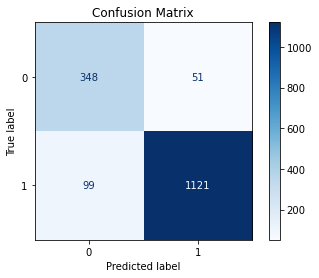

<Figure size 1800x3960 with 0 Axes>

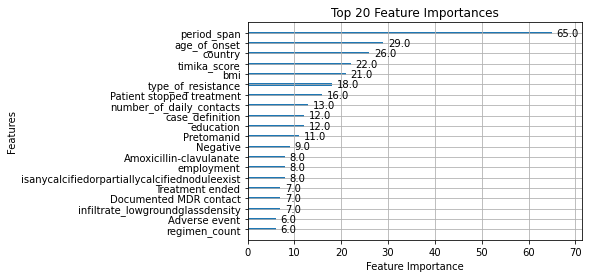

                                            Feature  Importance
35                                      period_span        65.0
34                                     age_of_onset        29.0
23                                          country        26.0
24                                     timika_score        22.0
30                                              bmi        21.0
..                                              ...         ...
57                               Patient drug abuse         1.0
56      Patient alcohol abuse not available/unknown         1.0
54                         Not_Reported-social_risk         1.0
1   pleural_effusion_percent_of_hemithorax_involved         1.0
42                                 Hepatic diseases         1.0

[101 rows x 2 columns]


In [289]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# model, metrics = evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# for data with none columns
model, metrics = evaluate_xgboost_classifier_split_weighted(
    X_train_resampled, X_test, y_train_resampled, y_test,
    max_depth=12,
    learning_rate=0.5,
    n_estimators=300,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# model, metrics = evaluate_xgboost_classifier_split_weighted(
#     X_train_resampled, X_test, y_train_resampled, y_test,
#     max_depth=8,
#     learning_rate=0.9,
#     n_estimators=400,
#     gamma=0.5,
#     min_child_weight=2,
#     subsample=0.8,
#     colsample_bytree=0.9,
#     reg_alpha=38, reg_lambda=69,
#     random_state=42,
# )

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)



In [170]:
importance_df.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/feature_importance.csv', index=False)

In [ ]:
print_full(importance_df)


In [290]:
# Calculate correlation matrix based on X_train_resampled
correlation_matrix = X_train_resampled.corr()

# Find the highest correlated feature for each feature
highest_correlations = []
for feature in importance_df['Feature']:
    if feature in correlation_matrix.columns:
        # Exclude self-correlation by setting it to -inf
        correlations = correlation_matrix.loc[feature].replace(1, -np.inf)
        highest_corr_feature = correlations.idxmax()
        highest_corr_value = correlations.max()
    else:
        highest_corr_feature = None
        highest_corr_value = None
    highest_correlations.append((highest_corr_feature, highest_corr_value))

# Update the importance DataFrame
importance_df['Highest Correlated Feature'] = [x[0] for x in highest_correlations]
importance_df['Correlation Value'] = [x[1] for x in highest_correlations]

# tools.display_dataframe_to_user(name="Feature Importance with Correlations from X_train_resampled", dataframe=importance_df)


In [306]:
feature_groups = {
    'main_lineage': ['La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4'],
    'culture': ['1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture'],
    'regimen_drug':['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid'],
    'treatment_status': ['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance'],
    'social_risk_factors':  ['Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees'],
    'comobidity': [' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics'],
    'diagnosis_code':['A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9']
}

# feature_levels = {
# feature_levels = {
#    'pre-diagnosis': ['country','education','gender','employment','Social_risk_factors','age_of_onset','bmi'],
#    'post-diagnosis': ['type_of_resistance','number_of_daily_contacts','case_definition','diagnosis_code','comorbidity','culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'main_lineage'],
#    'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
#    'Treatment-period' : ['regimen_drug','regimen_count','period_span','outcome','treatment status']
# }

## dummied features filled in
feature_levels = {
   'pre-diagnosis': ['country','education','gender','employment','Current smoker', 'Documented MDR contact', 'Ex prisoner', 'Homeless',
       'Immigrants', 'Not_Reported-social_risk', 'Patient alcohol abuse',
       'Patient alcohol abuse not available/unknown', 'Patient drug abuse',
       'Patient smoking data not available/unknown', 'TB care worker',
       'Worked abroad', 'internal migrants', 'refugees','age_of_onset','bmi'],
   'post-diagnosis': ['type_of_resistance','number_of_daily_contacts','case_definition',['A15.0', 'A15.1', 'A15.2', 'A15.3', 'A15.4', 'A15.5', 'A15.6', 'A15.7',
       'A15.8', 'A15.9', 'A16', 'A16.0', 'A16.2', 'A16.3', 'A16.5', 'A16.8',
       'A17.0', 'A18.0', 'A18.1', 'A18.2', 'A18.3', 'A18.4', 'A18.7', 'A18.8',
       'A19.0', 'A19.1', 'A19.8', 'A19.9'],' TNF-α antagonists', 'Anemia', 'COVID-19', 'Diabetes', 'HIV',
       'Hepatic diseases', 'Hepatitis B', 'Hepatitis C', 'None',
       'Not specified', 'Not_reported-Comorbidity', 'Others', 'Pneumoconiosis',
       'Post-COVID-19', 'Psychiatric illness', 'Renal disease',
       'Systemically administered glucocorticoids', 'cytostatics','1 to 19', '100 to 200', '20 to 100', 'MOTT', 'More than 200',
       'Negative', 'Nonspecific microflora', 'Not_Reported-culture', 'Not done-culture',
       'Positive', 'Study in progress', 'Unknown_result-culture','genexpert_test','bactec_isoniazid','bactec_rifampicin','bactec_ethambutol', 'La1', 'La2', 'lineage1', 'lineage1-lineage2', 'lineage2',
       'lineage2-lineage4', 'lineage3', 'lineage3-lineage4', 'lineage4'],
   'post-scan' : ['overall_percent_of_abnormal_volume','pleural_effusion_percent_of_hemithorax_involved','ispleuraleffusionbilateral','other_non_tb_abnormalities','are_mediastinal_lymphnodes_present','Collapse','smallcavities','mediumcavities','largecavities','isanylargecavitybelongtoamultisextantcavity','canmultiplecavitiesbeseen','infiltrate_lowgroundglassdensity','infiltrate_mediumdensity','infiltrate_highdensity','smallnodules','mediumnodules','Largenodules','Hugenodules','isanycalcifiedorpartiallycalcifiednoduleexist','isanynoncalcifiednoduleexist','isanyclusterednoduleexists','aremultiplenoduleexists','lowgroundglassdensityactivefreshnodules','mediumdensitystabilizedfibroticnodules','highdensitycalcifiedtypicallysequella','timika_score', 'lung_localization','totalcavernum'],
   'Treatment-period' : [['Amikacin', 'Aminoglycosides - injectible agents',
       'Amoxicillin-clavulanate', 'Antiretroviral therapy', 'Bedaquiline',
       'Capreomycin', 'Clarithromycin', 'Clofazimine',
       'Cotrimoxazol preventive', 'Cycloserine', 'Delamanid', 'Ethambutol',
       'Ethionamide', 'Fluoroquinolones', 'Gatifloxacin', 'Gatifloxacin 0.5',
       'Imipenem-cilastatin', 'Isoniazid', 'Kanamycin', 'Levofloxacin',
       'Linezolid', 'Moxifloxacin', 'Mycobutin', 'Not_Reported-regimen_drug', 'Ofloxacin',
       'Pretomanid', 'Prothionamide', 'Pyrazinamide', 'Rifampicin',
       'Streptomycin', 'Terizidone', 'p-aminosalicylic acid'],'regimen_count','period_span','outcome',['Adverse event', 'Continuation of treatment',
       'Drug(s) no longer available', 'New drugs available', 'Not_Reported-treatment_status',
       'Patient stopped treatment', 'Terminated from study', 'Treatment ended',
       'Treatment ineffective due to additional resistance']]
}


In [304]:
for x in clinical_lung_features.columns:
    print(x)

overall_percent_of_abnormal_volume
pleural_effusion_percent_of_hemithorax_involved
ispleuraleffusionbilateral
other_non_tb_abnormalities
are_mediastinal_lymphnodes_present
collapse
smallcavities
mediumcavities
largecavities
isanylargecavitybelongtoamultisextantcavity
canmultiplecavitiesbeseen
infiltrate_lowgroundglassdensity
infiltrate_mediumdensity
infiltrate_highdensity
smallnodules
mediumnodules
largenodules
hugenodules
isanycalcifiedorpartiallycalcifiednoduleexist
isanynoncalcifiednoduleexist
isanyclusterednoduleexists
aremultiplenoduleexists
lowgroundglassdensityactivefreshnodules
mediumdensitystabalizedfibroticnodules
highdensitycalcifiedtypicallysequella
country
timika_score
education
gender
employment
type_of_resistance
number_of_daily_contacts
bmi
lung_localization
totalcavernum
case_definition
age_of_onset
period_span
regimen_count
genexpert_test
bactec_isoniazid
bactec_rifampicin
bactec_ethambutol
 TNF-α antagonists
Anemia
COVID-19
Diabetes
HIV
Hepatic diseases
Hepatitis B
H

In [ ]:
_ = []
for x in importance_df['Feature']:
    a = x
    for key, value in feature_groups.items():
        if x in value:
            a = key
    _.append(a)

In [296]:
importance_df['Feature Group'] = _

In [299]:
importance_df = importance_df[['Feature', 'Feature Group', 'Importance', 'Highest Correlated Feature', 'Correlation Value']]

In [301]:
importance_df = importance_df.sort_values(by=['Feature Group', 'Importance'], ascending=[True, False])

In [302]:
importance_df

,Feature,Feature Group,Importance,Highest Correlated Feature,Correlation Value
35,period_span,,65.0,Capreomycin,0.347235
34,age_of_onset,,29.0,Others,0.168350
23,country,,26.0,Not_Reported-social_risk,0.510401
24,timika_score,,22.0,overall_percent_of_abnormal_volume,0.691929
30,bmi,,21.0,Diabetes,0.153587
...,...,...,...,...,...
62,Adverse event,treatment_status,6.0,Imipenem-cilastatin,0.169962
68,Treatment ineffective due to additional resist...,treatment_status,5.0,regimen_count,0.190065
65,Not_Reported-treatment_status,treatment_status,4.0,A19.8,0.269974
63,Continuation of treatment,treatment_status,3.0,regimen_count,0.544114


In [297]:

importance_df.to_csv('/mnt/storageG1/lwang/Projects/TBpt/Analysis/feature_importance.csv', index=False)

In [291]:
importance_df

,Feature,Importance,Highest Correlated Feature,Correlation Value
35,period_span,65.0,Capreomycin,0.347235
34,age_of_onset,29.0,Others,0.168350
23,country,26.0,Not_Reported-social_risk,0.510401
24,timika_score,22.0,overall_percent_of_abnormal_volume,0.691929
30,bmi,21.0,Diabetes,0.153587
...,...,...,...,...
57,Patient drug abuse,1.0,Hepatitis C,0.372364
56,Patient alcohol abuse not available/unknown,1.0,Patient smoking data not available/unknown,0.699079
54,Not_Reported-social_risk,1.0,country,0.510401
1,pleural_effusion_percent_of_hemithorax_involved,1.0,Positive,0.171678


### dropping

In [223]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames to retain feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize variables
dropped_features = []
remaining_features = list(importance_df['Feature'])  # Start with all features
baseline_model = XGBClassifier(
    max_depth=9,
    learning_rate=0.9,
    n_estimators=400,
    gamma=0.5,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.9,
    reg_alpha=38, reg_lambda=69,
    random_state=42,
)

# Train the baseline model
baseline_model.fit(X_train_scaled_df[remaining_features], y_train_resampled)
y_pred = baseline_model.predict(X_test_scaled_df[remaining_features])
baseline_accuracy = accuracy_score(y_test, y_pred)

# Calculate baseline sensitivity, specificity, and F1 score
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
baseline_sensitivity = tp / (tp + fn)  # Recall
baseline_specificity = tn / (tn + fp)
baseline_f1 = f1_score(y_test, y_pred)

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Sensitivity (Recall): {baseline_sensitivity:.4f}")
print(f"Baseline Specificity: {baseline_specificity:.4f}")
print(f"Baseline F1 Score: {baseline_f1:.4f}")

# Reverse the importance dataframe for iterative feature elimination
importance_df_ = importance_df.iloc[::-1].copy()

# Start feature elimination
for feature in importance_df_['Feature']:
    # Remove the least important feature
    remaining_features.remove(feature)
    dropped_features.append(feature)

    # Train the model with remaining features
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        reg_alpha=38, 
        reg_lambda=69,  
        random_state=42,
    )
    model.fit(X_train_scaled_df[remaining_features], y_train_resampled)
    y_pred = model.predict(X_test_scaled_df[remaining_features])

    # Calculate metrics
    current_accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    current_sensitivity = tp / (tp + fn)  # Recall
    current_specificity = tn / (tn + fp)
    current_f1 = f1_score(y_test, y_pred)

    print(f"After dropping '{feature}':")
    print(f"  Accuracy: {current_accuracy:.4f}")
    print(f"  Sensitivity (Recall): {current_sensitivity:.4f}")
    print(f"  Specificity: {current_specificity:.4f}")
    print(f"  F1 Score: {current_f1:.4f}")

    # Stop if accuracy drops
    if current_accuracy < baseline_accuracy:
        print("\nStopping criteria met.")
        print(f"Features dropped: {dropped_features}")
        print(f"Remaining features: {remaining_features}")
        break
else:
    print("\nAll features tested. Final feature set:")
    print(f"Remaining features: {remaining_features}")


Baseline Accuracy: 0.9127
Baseline Sensitivity (Recall): 0.9318
Baseline Specificity: 0.8543
Baseline F1 Score: 0.9415


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Hepatic diseases':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9359
  Specificity: 0.8543
  F1 Score: 0.9437


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'ispleuraleffusionbilateral':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'largecavities':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'canmultiplecavitiesbeseen':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'infiltrate_highdensity':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'isanyclusterednoduleexists':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'regimen_count':
  Accuracy: 0.9152
  Sensitivity (Recall): 0.9351
  Specificity: 0.8543
  F1 Score: 0.9432


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'genexpert_test':
  Accuracy: 0.9139
  Sensitivity (Recall): 0.9318
  Specificity: 0.8593
  F1 Score: 0.9423


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Anemia':
  Accuracy: 0.9139
  Sensitivity (Recall): 0.9318
  Specificity: 0.8593
  F1 Score: 0.9423


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Diabetes':
  Accuracy: 0.9139
  Sensitivity (Recall): 0.9318
  Specificity: 0.8593
  F1 Score: 0.9423


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Renal disease':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9343
  Specificity: 0.8593
  F1 Score: 0.9436


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Homeless':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9343
  Specificity: 0.8593
  F1 Score: 0.9436


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Amoxicillin-clavulanate':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Cotrimoxazol preventive':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9343
  Specificity: 0.8543
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Ethambutol':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9343
  Specificity: 0.8593
  F1 Score: 0.9436


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'overall_percent_of_abnormal_volume':
  Accuracy: 0.9139
  Sensitivity (Recall): 0.9343
  Specificity: 0.8518
  F1 Score: 0.9424


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Pyrazinamide':
  Accuracy: 0.9146
  Sensitivity (Recall): 0.9351
  Specificity: 0.8518
  F1 Score: 0.9428


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'p-aminosalicylic acid':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9359
  Specificity: 0.8543
  F1 Score: 0.9437
After dropping 'Fluoroquinolones':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9359
  Specificity: 0.8543
  F1 Score: 0.9437


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping '1 to 19':
  Accuracy: 0.9139
  Sensitivity (Recall): 0.9343
  Specificity: 0.8518
  F1 Score: 0.9424
After dropping 'Moxifloxacin':
  Accuracy: 0.9152
  Sensitivity (Recall): 0.9351
  Specificity: 0.8543
  F1 Score: 0.9432


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping '20 to 100':
  Accuracy: 0.9152
  Sensitivity (Recall): 0.9351
  Specificity: 0.8543
  F1 Score: 0.9432
After dropping '100 to 200':
  Accuracy: 0.9195
  Sensitivity (Recall): 0.9392
  Specificity: 0.8593
  F1 Score: 0.9462


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'bactec_isoniazid':
  Accuracy: 0.9152
  Sensitivity (Recall): 0.9359
  Specificity: 0.8518
  F1 Score: 0.9433
After dropping 'Current smoker':
  Accuracy: 0.9176
  Sensitivity (Recall): 0.9384
  Specificity: 0.8543
  F1 Score: 0.9450


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'isanynoncalcifiednoduleexist':
  Accuracy: 0.9176
  Sensitivity (Recall): 0.9384
  Specificity: 0.8543
  F1 Score: 0.9450
After dropping 'Worked abroad':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9376
  Specificity: 0.8492
  F1 Score: 0.9438


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'New drugs available':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9376
  Specificity: 0.8492
  F1 Score: 0.9438
After dropping 'smallnodules':
  Accuracy: 0.9189
  Sensitivity (Recall): 0.9376
  Specificity: 0.8618
  F1 Score: 0.9457


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Amikacin':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9351
  Specificity: 0.8568
  F1 Score: 0.9436


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Bedaquiline':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9376
  Specificity: 0.8492
  F1 Score: 0.9438


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Capreomycin':
  Accuracy: 0.9152
  Sensitivity (Recall): 0.9334
  Specificity: 0.8593
  F1 Score: 0.9431
After dropping 'Clofazimine':
  Accuracy: 0.9158
  Sensitivity (Recall): 0.9367
  Specificity: 0.8518
  F1 Score: 0.9437


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'Linezolid':
  Accuracy: 0.9133
  Sensitivity (Recall): 0.9343
  Specificity: 0.8492
  F1 Score: 0.9420
After dropping 'More than 200':
  Accuracy: 0.9152
  Sensitivity (Recall): 0.9367
  Specificity: 0.8492
  F1 Score: 0.9433


/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After dropping 'other_non_tb_abnormalities':
  Accuracy: 0.9127
  Sensitivity (Recall): 0.9351
  Specificity: 0.8442
  F1 Score: 0.9417
After dropping 'infiltrate_mediumdensity':
  Accuracy: 0.9115
  Sensitivity (Recall): 0.9334
  Specificity: 0.8442
  F1 Score: 0.9408

Stopping criteria met.
Features dropped: ['Hepatic diseases', 'ispleuraleffusionbilateral', 'largecavities', 'canmultiplecavitiesbeseen', 'infiltrate_highdensity', 'isanyclusterednoduleexists', 'regimen_count', 'genexpert_test', 'Anemia', 'Diabetes', 'Renal disease', 'Homeless', 'Amoxicillin-clavulanate', 'Cotrimoxazol preventive', 'Ethambutol', 'overall_percent_of_abnormal_volume', 'Pyrazinamide', 'p-aminosalicylic acid', 'Fluoroquinolones', '1 to 19', 'Moxifloxacin', '20 to 100', '100 to 200', 'bactec_isoniazid', 'Current smoker', 'isanynoncalcifiednoduleexist', 'Worked abroad', 'New drugs available', 'smallnodules', 'Amikacin', 'Bedaquiline', 'Capreomycin', 'Clofazimine', 'Linezolid', 'More than 200', 'other_non_tb_a

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:33:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## train multiclass

/mnt/storageG1/lwang/miniconda3/envs/ml-workshop/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:18:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Accuracy: 0.9178
Testing Accuracy: 0.8594
Sensitivity (Recall) Per Class:
  Class 0: 0.7342
  Class 1: 0.6170
  Class 2: 0.8000
  Class 3: 0.9121


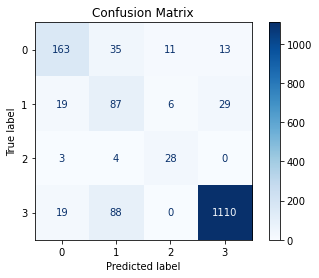

<Figure size 1800x3960 with 0 Axes>

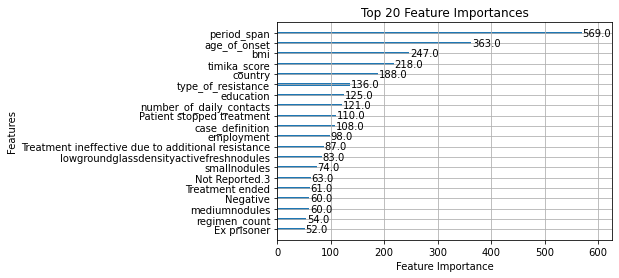

                         Feature  Importance
37                   period_span       569.0
36                  age_of_onset       363.0
32                           bmi       247.0
26                  timika_score       218.0
25                       country       188.0
..                           ...         ...
72                         A19.0         1.0
48              Hepatic diseases         1.0
113                         MOTT         1.0
76   Drug(s) no longer available         1.0
117               Not Reported.4         1.0

[121 rows x 2 columns]


In [60]:
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the data and transform it
clinical_lung_features_imputed = imputer.fit_transform(clinical_lung_features)

# Convert the result back to a DataFrame
clinical_lung_features_imputed_df = pd.DataFrame(clinical_lung_features_imputed, columns=clinical_lung_features.columns)

# Optionally, replace the original DataFrame with the imputed one
clinical_lung_features = clinical_lung_features_imputed_df

import pandas as pd
from sklearn.utils import resample

# Assuming 'clinical_lung' is your DataFrame and 'outcome' is the target column
X_train, X_test, y_train, y_test = train_test_split(
    clinical_lung_features, clinical_lung_target, test_size=0.2, random_state=42, stratify=clinical_lung_target, shuffle=True
)

from imblearn.over_sampling import RandomOverSampler

# target_counts = {
#     1.0: 6311,  # Keep the majority class as is
#     0.0: 3311,  # Bring other classes closer
# }
# Initialize the RandomOverSampler
# ros = RandomOverSampler(random_state=42, sampling_strategy=target_counts)
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=0.3, reg_lambda=19,  random_state=42)
# evaluate_xgboost_classifier_split_weighted(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
# evaluate_xgboost_classifier_split(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)
model, metrics = evaluate_xgboost_classifier_multiclass(X_train_resampled, X_test, y_train_resampled, y_test, reg_alpha=38, reg_lambda=69,  random_state=42)

# Extract feature importance from the trained model
feature_importances = model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

# Display or save the DataFrame
print(importance_df)

